<a href="https://colab.research.google.com/github/Yogitasoni1708/2d-drawin-python-/blob/main/assinment_lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving lung_cancer_dataset.csv to lung_cancer_dataset (1).csv

Data Head:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICU

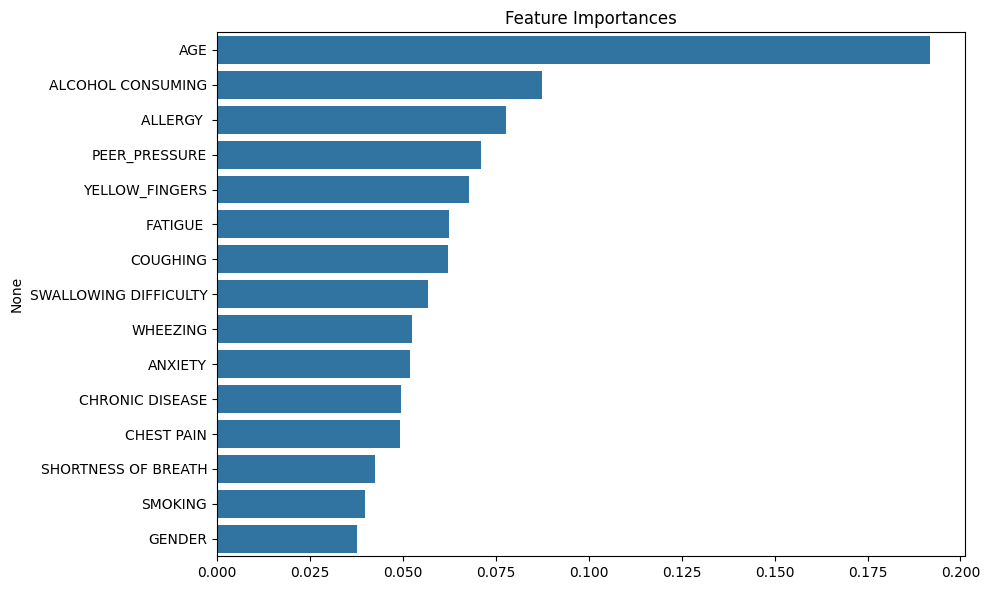

In [1]:
# Lung Cancer Detection Using Machine Learning - Google Colab Ready

# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# i use publicly available dataset from Kaggle: 'Lung Cancer Data'
# You can download it from: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer
from google.colab import files
uploaded = files.upload()

# Read CSV file into pandas dataframe
# Assuming the file is named "lung_cancer_dataset.csv"
df = pd.read_csv("lung_cancer_dataset.csv")

# Explore Dataset
print("\nData Head:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nClass Distribution:")
print(df['LUNG_CANCER'].value_counts())

# Preprocess Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = le.fit_transform(df['GENDER'])

# Split into Train
X = df.drop(['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# model Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices])
plt.tight_layout()
plt.show()

# New Section